In [1]:
import numpy as np
from skimage.io import imread
from skimage.transform import radon,iradon

% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.rcParams['text.latex.preamble']=[
    r'\usepackage{amsmath}',
    r'\usepackage{helvet}',
    r'\usepackage{sansmath}',
    r'\sansmath',
    r'\usepackage{xcolor}',
    r'\renewcommand{\familydefault}{\sfdefault}',
    r'\usepackage[T1]{fontenc}',
    r'\usepackage{graphicx}',
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}',
    r'\usepackage{relsize}',
    r'\newcommand{\bigpi}{\scalebox{5}{\ensuremath{\pi}}}'
]

In [38]:
I=imread('./temp.png').mean(2)/128.
I=I[:,np.arange(219,-1,-1)]
# I=I[np.arange(219,-1,-1),:]

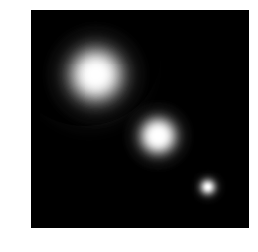

In [39]:
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.show()

In [40]:
def f(X,rho):
    theta=np.array([np.cos(-(np.pi/2.)-np.pi*rho/180.),
                    np.sin(-(np.pi/2.)-np.pi*rho/180.)])
    return np.matmul(X,theta).squeeze()

In [41]:
gridx,gridy=np.meshgrid(np.linspace(-110,110,num=100),np.linspace(-110,110,num=100))
gridvec = np.concatenate((np.reshape(gridx,(10000,1)),np.reshape(gridy,(10000,1))),1)

In [42]:
theta=np.arange(-90,91)
# I*=0
# I[140:200,140:200]=1.
# I[50:70,50:70]=1.
# I[90:130,90:130]=1.
RI=radon(I,theta,circle=False)
tinv=np.arange(RI.shape[0]-1,-1,-1)

In [43]:
import os 
if not(os.path.isdir('./Radon/')):
    os.mkdir('./Radon/')


In [44]:
np.arange(219,-1,-1)

array([219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207,
       206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194,
       193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181,
       180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168,
       167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155,
       154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142,
       141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129,
       128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116,
       115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103,
       102, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,
        89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,
        76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,
        63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,
        50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  3

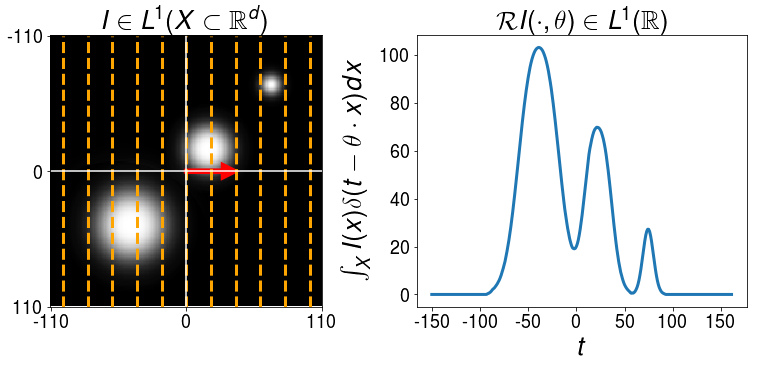

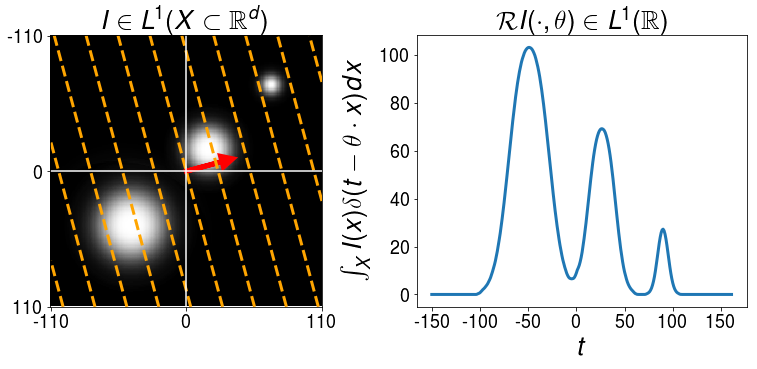

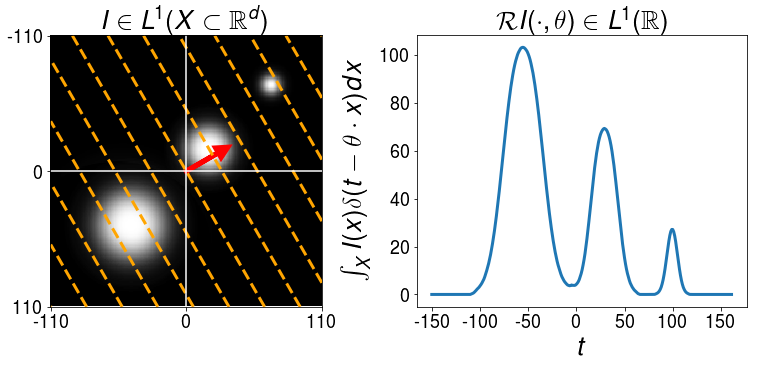

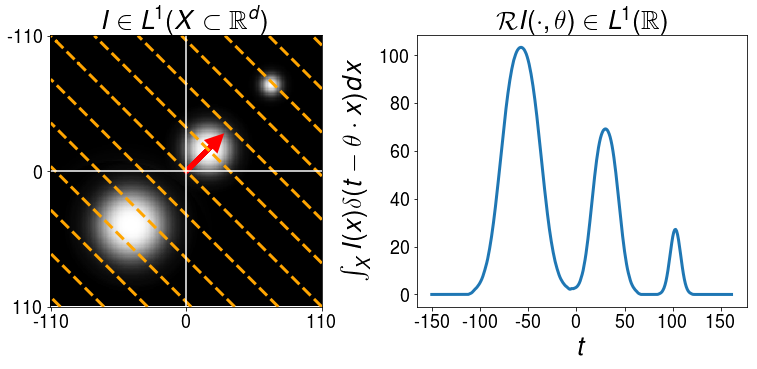

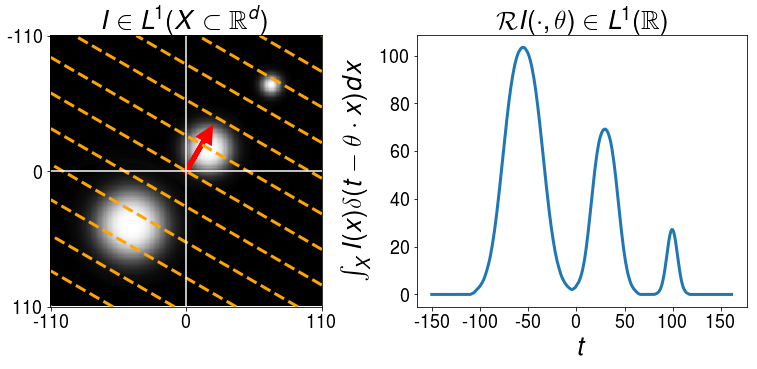

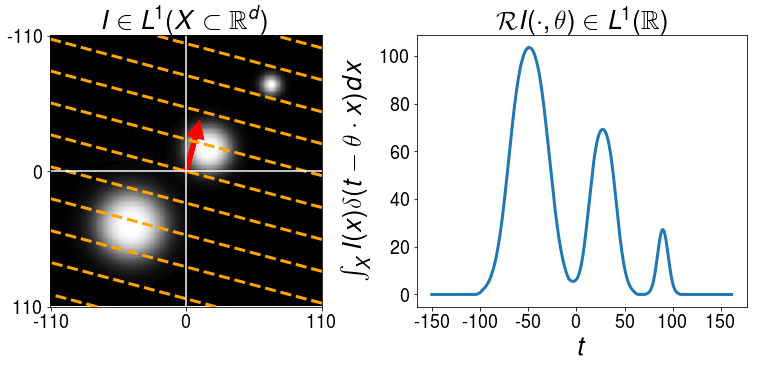

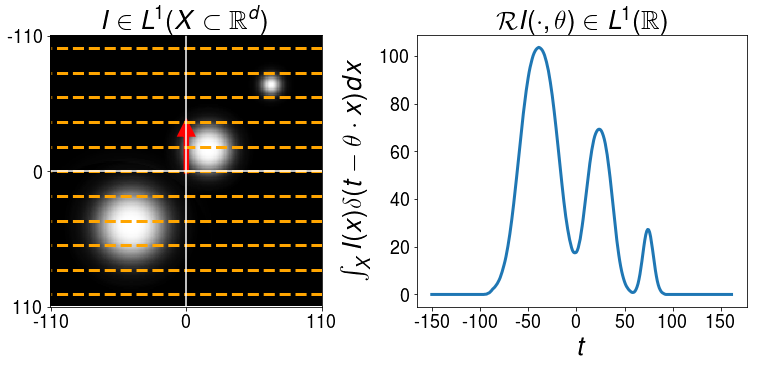

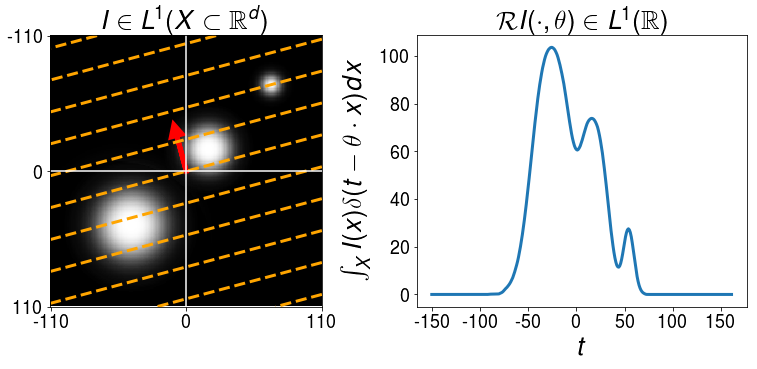

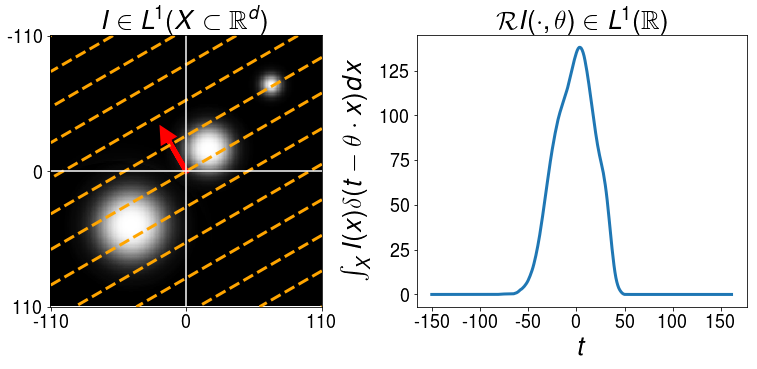

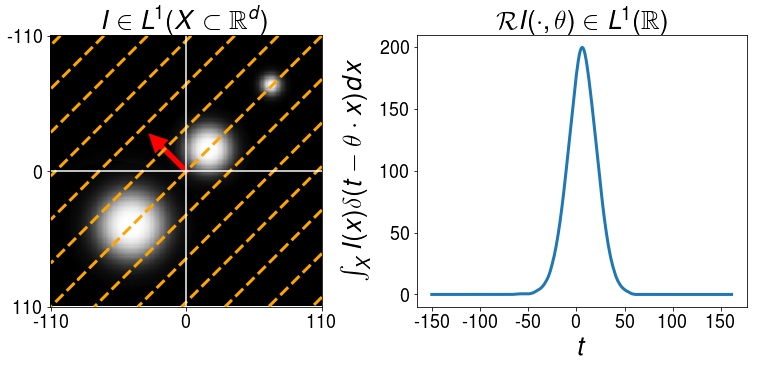

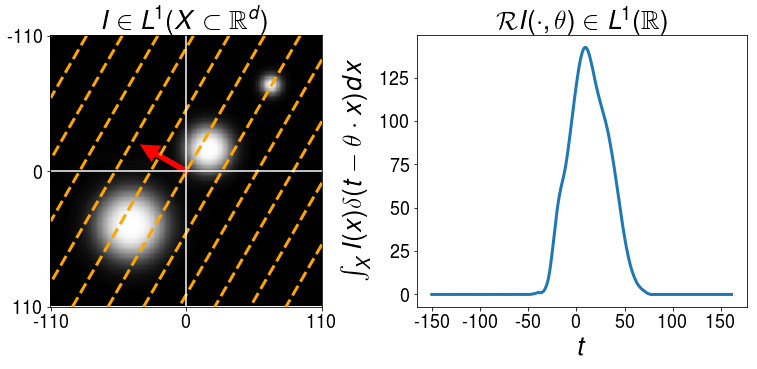

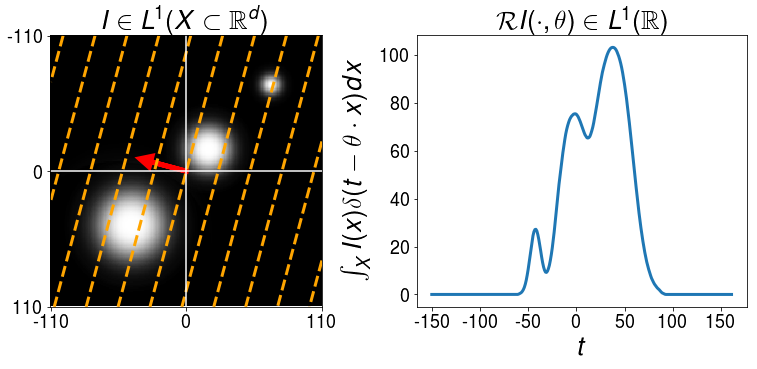

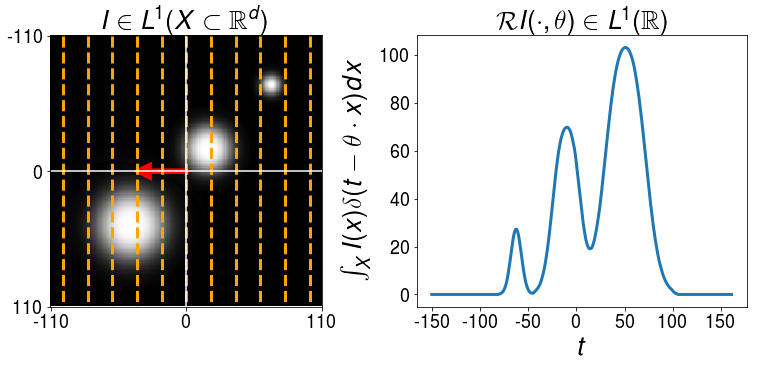

In [51]:

for n,i in enumerate(np.arange(0,181,15)):
    fig,ax=plt.subplots(1,2,figsize=(13,5))
    Itemp=I.copy()
#     Itemp=Itemp[:,np.arange(219,-1,-1)]
    Itemp=Itemp[np.arange(219,-1,-1),:]
    
    ax[0].imshow(Itemp,cmap='gray')
    ax[0].plot([110,110],[0,220],'-',c='w')
    ax[0].plot([0,220],[110,110],'-',c='w')

    CS=ax[0].contour(gridx+110, gridy+110, np.reshape(f(gridvec,theta[i]),(100,100))
                  ,12, colors="orange", linestyles="--",linewidths=3)
    l=30
    ax[0].arrow(110,110,
                l*np.cos(-(np.pi/2.)-np.pi*theta[i]/180.),
                l*np.sin(-(np.pi/2.)-np.pi*theta[i]/180.),
                color='red',capstyle='projecting',
                head_width=9, head_length=9,linewidth=5)

    # a=CS.get_array()
    # a/=abs(a).max()
    # CS.set_array(a)
    # ax[0].clabel(CS, inline=1, fontsize=10)

#     ax[0].axis('off')
    ax[0].set_xticks(np.linspace(0,220,3).astype('int'))
    ax[0].set_xticklabels([-110,0,110])
    ax[0].set_yticks(np.linspace(0,220,3).astype('int'))
    ax[0].set_yticklabels([-110,0,110])
    ax[0].set_title(r'$I\in L^1(X\subset \mathbb{R}^d)$',fontsize=26)
    
    ax[1].plot(RI[:,i],linewidth=3)
    ax[1].set_xticks(np.arange(0,312,50).astype('int'))
    ax[1].set_xticklabels(np.arange(-150,155,50).astype('int'))
    ax[1].set_ylabel(r'$\int_X I(x)\delta(t-\textcolor{red}{\theta}\cdot x)dx$',fontsize=26)
    ax[1].set_xlabel(r'$t$',fontsize=26)
    ax[1].set_title(r'$\mathcal{R}I(\cdot,\theta) \in L^1(\mathbb{R})$',fontsize=26)    
    for i in range(2):
        ax[i].tick_params(axis='x', which='major', labelsize=18)
        ax[i].tick_params(axis='y', which='major', labelsize=18)    
    fig.savefig('./Radon/img%02d.png'%(n+1),transparent=True)
    plt.show()

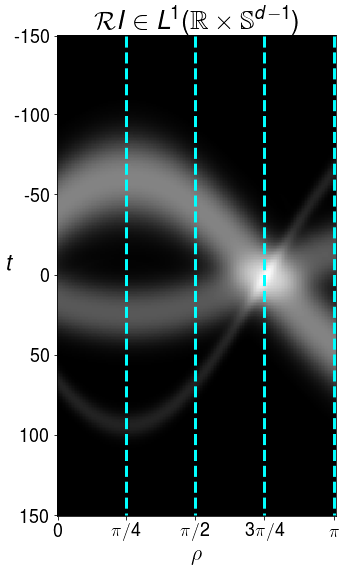

In [46]:
fig=plt.figure(figsize=(5,10))
plt.imshow(RI,cmap='gray')
plt.yticks(np.linspace(0,311,7).astype('int'),np.linspace(-150,150,7).astype('int'),fontsize=18)
plt.xticks(np.linspace(0,179,5).astype('int'),
           [r'$0$',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'],
           fontsize=18)
plt.title(r'$\mathcal{R}I \in L^1(\mathbb{R}\times \mathbb{S}^{d-1})$',fontsize=26)    
plt.plot([179,179],[0,311],'--',color='cyan',linewidth=3)
plt.plot([44,44],[0,311],'--',color='cyan',linewidth=3)
plt.plot([89,89],[0,311],'--',color='cyan',linewidth=3)
plt.plot([134,134],[0,311],'--',color='cyan',linewidth=3)
plt.xlabel(r'$\rho$',fontsize=22)
plt.ylabel(r'$t$',fontsize=22).set_rotation(0)
fig.savefig('./Radon/Sinogram.png',transparent=True)
plt.show()

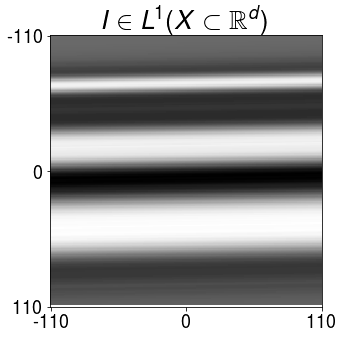

In [23]:
theta=np.arange(180)
i=89
IR=iradon(RI[:,theta[i]][:,np.newaxis],theta=[theta[i]],circle=False,filter='hann')[np.arange(219,0,-1),:]
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.imshow(IR,cmap='gray')
ax.set_xticks(np.linspace(0,220,3).astype('int'))
ax.set_xticklabels([-110,0,110])
ax.set_yticks(np.linspace(0,220,3).astype('int'))
ax.set_yticklabels([-110,0,110])
ax.set_title(r'$I\in L^1(X\subset \mathbb{R}^d)$',fontsize=26)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18)    